# Dataset preparation

In [ ]:
import joblib
import timeit
start = timeit.default_timer()

new_dict = joblib.load('word_properties_path')
# keys = (word, part of speech, word type), values = [frequency, word embedding centroid, average l2-norm]

stop = timeit.default_timer()
print('time load freq_dict (Sec): ', stop-start)

In [2]:
len(new_dict)

998891

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy import stats
from sklearn.decomposition import PCA
import random
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore") 

In [5]:
# stop words
dict_stop = {i:k for (i,k) in new_dict.items() if i[2]=='STOP'}
len(dict_stop)

1466

In [6]:
print('total frequency: ', sum([k[0] for (i,k) in dict_stop.items()]))

total frequency:  431227227


In [7]:
# non-stop words
dict_non_stop = {i:k for (i,k) in new_dict.items() if i[2]=='NON_STOP'}
len(dict_non_stop)

997425

In [8]:
print('total frequency: ', sum([k[0] for (i,k) in dict_non_stop.items()]))

total frequency:  341628241


In [9]:
# stop words, noun
dict_stop_N = {i:k for (i,k) in new_dict.items() if i[2]=='STOP' and i[1]=='NOUN'}
len(dict_stop_N)

195

In [10]:
# stop words, verb
dict_stop_V = {i:k for (i,k) in new_dict.items() if i[2]=='STOP' and i[1]=='VERB'}
len(dict_stop_V)

207

In [11]:
# non-stop words, noun
dict_non_stop_N = {i:k for (i,k) in new_dict.items() if i[2]=='NON_STOP' and i[1]=='NOUN'}
len(dict_non_stop_N)

449252

In [12]:
# non-stop words, verb
dict_non_stop_V = {i:k for (i,k) in new_dict.items() if i[2]=='NON_STOP' and i[1]=='VERB'}
len(dict_non_stop_V)

209669

In [13]:
# frequency range and distribution
no_bin = 10
all_log2_freq = [np.log2(i[0]) for i in new_dict.values()]
max_freq = max(all_log2_freq)
move = max_freq/no_bin
max_freq

25.180947690553236

In [14]:
move

2.5180947690553235

# BookCorpus word frequency range distribution

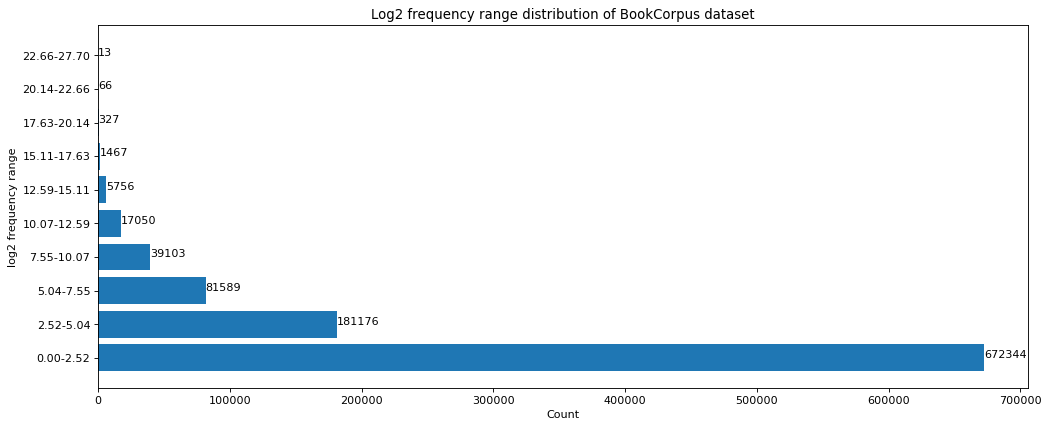

In [45]:
x = [] 
y = []
for bin_no in range(no_bin):
    left = bin_no*move
    if bin_no != no_bin-1:
        right = left + move
    else:
        right = max_freq + move
    if bin_no==0:
        temp = [i for i in all_log2_freq if (i>=left) and (i<=right)]
    else:
        temp = [i for i in all_log2_freq if (i>left) and (i<=right)]
    x.append("{:.2f}".format(left) + '-' + "{:.2f}".format(right))
    y.append(len(temp))

figure(figsize=(15, 6), dpi=80)
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.xlabel('Count')
plt.ylabel('log2 frequency range')
plt.title('Log2 frequency range distribution of BookCorpus dataset')
plt.show()

# Word frequency VS l2-norm for all words

In [16]:
plt.rcParams.update({'font.size': 20})

In [26]:
plt.rc('legend', fontsize=16)  

In [19]:
def l2_freq_plot(list_dict_name, scatter):
    # list_dict_name = list of (dict_name, label)
    # scatter = True (scatter plot), False otherwise
    figure(figsize=(8, 6), dpi=80)
    s=3 # for scatter plot
    for (dict_name, label) in list_dict_name:
        x1=[np.log2(f[0]) for f in list(dict_name.values())] # log2 freq
        y1=[f[2]/f[0] for f in list(dict_name.values())] # l2-norm
        res1 = stats.linregress(x1, y1)
        if scatter == True:
            plt.scatter(x1,y1, s=s)
        plt.plot(x1, [res1.slope*j + res1.intercept for j in x1], label=label)
        print(label + ' stats: ')
        print(f"The Pearson correlation coefficient: {res1.rvalue:.6f}")
        print(f"The p-value (<0.05 to reject null hypothesis): {res1.pvalue:.6f}")
        print(stats.spearmanr(x1, y1))
        print('slope: ', res1.slope, '(' + 'cosine similarity/' + 'log2-frequency)')
        print('#'*50)
    plt.ylabel('l2-norm')
    plt.xlabel('log2 frequency')
    #plt.title('l2-norm and word frequency plot with different word types')
    plt.legend()
    plt.show()

all words stats: 
The Pearson correlation coefficient: 0.377472
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3731212298673847, pvalue=0.0)
slope:  0.15969482199963217 (cosine similarity/log2-frequency)
##################################################
non_stop stats: 
The Pearson correlation coefficient: 0.375470
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.37166766149424735, pvalue=0.0)
slope:  0.15982745164217851 (cosine similarity/log2-frequency)
##################################################
non_stop_N stats: 
The Pearson correlation coefficient: 0.435751
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3949360922376658, pvalue=0.0)
slope:  0.16584524133930745 (cosine similarity/log2-frequency)
##################################################
non_stop_V stats: 
The Pearson correlation coefficient: 0.424257
The p-value (<0.05 to reject null hypothesis): 0.000

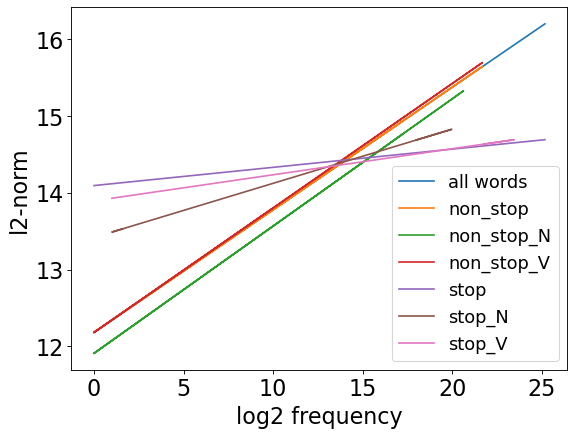

In [27]:
list_dict_name = [(new_dict, 'all words'), (dict_non_stop, 'non_stop'), (dict_non_stop_N, 'non_stop_N'),
                 (dict_non_stop_V, 'non_stop_V'), (dict_stop, 'stop'), (dict_stop_N, 'stop_N'), 
                  (dict_stop_V, 'stop_V')]
l2_freq_plot(list_dict_name, scatter=False)

non-stop words stats: 
The Pearson correlation coefficient: 0.375470
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.37166766149424735, pvalue=0.0)
slope:  0.15982745164217851 (cosine similarity/log2-frequency)
##################################################
stop words stats: 
The Pearson correlation coefficient: 0.169722
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.16967522899190451, pvalue=6.213369560956812e-11)
slope:  0.02375977464564598 (cosine similarity/log2-frequency)
##################################################


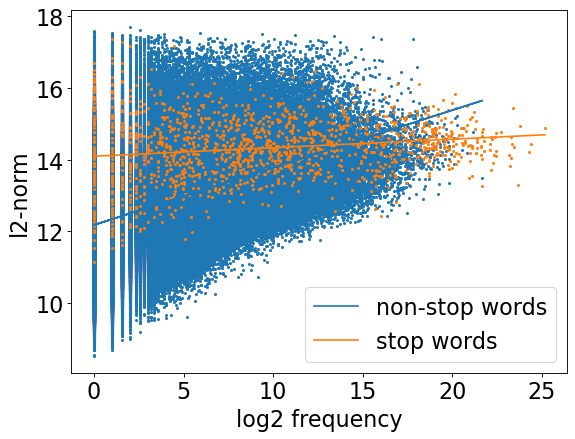

In [20]:
list_dict_name = [(dict_non_stop, 'non-stop words'), (dict_stop, 'stop words')]
l2_freq_plot(list_dict_name, scatter=True)

In [19]:
# stop words and non-stop words slope different
non_slope = 0.15982745164217851
stop_slope = 0.02375977464564598
print('stop words and non-stop words slope different (%): ', 100*((non_slope-stop_slope)/non_slope))

stop words and non-stop words slope different (%):  85.13410906479363


In [15]:
norms = [v[2]/v[0] for v in new_dict.values()]
print('avg norm: ', sum(norms)/len(norms))

avg norm:  12.542183096463798


# Word frequency VS l2-norm for each word type

In [ ]:
# word frequency VS l2-norm plot
def local_prop_plot(prop, new_dict, stop, typ, squ):
    figure(figsize=(4, 3), dpi=80)
    #[f[0] for f in list(new_dict.values())]
    x=[np.log2(f[0]) for f in list(new_dict.values())]
    if prop == 'l2norm':
        if squ!= 'square':
            y=[f[2]/f[0] for f in list(new_dict.values())]
        else:
            y=[(f[2]/f[0])**2 for f in list(new_dict.values())]
    else:
        y=[f[1] for f in list(new_dict.values())]
    res = stats.linregress(x, y)

    #plt.scatter(x,y)
    #z = np.polyfit(x, y, 1)
    #p = np.poly1d(z)
    #plt.plot(x,p(x),"r--")

    plt.scatter(x,y, label='raw data')
    plt.plot(x, [res.slope*j + res.intercept for j in x], "r--", label='trend line')
    plt.legend()
    plt.title(stop + ' words' + ' (' + typ + ')')
    plt.xlabel('log2 frequency')
    if prop == 'l2norm':
        if squ!= 'square':
            plt.ylabel('average l2 norm')
        else:
            plt.ylabel('average squared l2 norm')
    else:
        plt.ylabel('local isotropy')
    plt.show()

    print(f"The Pearson correlation coefficient: {res.rvalue:.6f}")
    print(f"The p-value (<0.05 to reject null hypothesis): {res.pvalue:.6f}")
    print(stats.spearmanr(x, y))
    print('slope: ', res.slope, '(' + squ + ' norm/' + 'log2-frequency)')

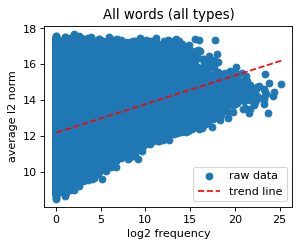

The Pearson correlation coefficient: 0.377472
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3731212298673847, pvalue=0.0)
slope:  0.15969482199963217 (non_square norm/log2-frequency)


In [46]:
local_prop_plot('l2norm', new_dict, 'All', 'all types', 'non_square')

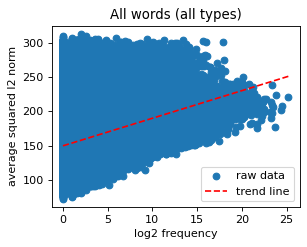

The Pearson correlation coefficient: 0.374233
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3731212298673847, pvalue=0.0)
slope:  4.033839541076078 (square norm/log2-frequency)


In [47]:
local_prop_plot('l2norm', new_dict, 'All', 'all types', 'square')

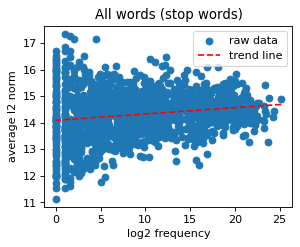

The Pearson correlation coefficient: 0.169722
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.16967522899190451, pvalue=6.213369560956812e-11)
slope:  0.02375977464564598 (non_square norm/log2-frequency)


In [48]:
local_prop_plot('l2norm', dict_stop, 'All', 'stop words', 'non_square')

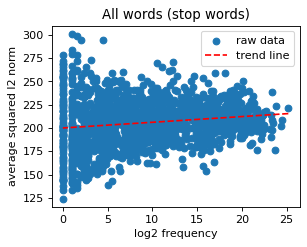

The Pearson correlation coefficient: 0.153852
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.16967522899190451, pvalue=6.213369560956812e-11)
slope:  0.6133993478257321 (square norm/log2-frequency)


In [49]:
local_prop_plot('l2norm', dict_stop, 'All', 'stop words', 'square')

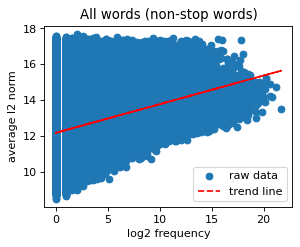

The Pearson correlation coefficient: 0.375470
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.37166766149424735, pvalue=0.0)
slope:  0.15982745164217851 (non_square norm/log2-frequency)


In [50]:
local_prop_plot('l2norm', dict_non_stop, 'All', 'non-stop words', 'non_square')

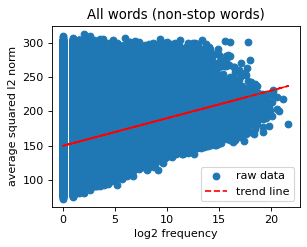

The Pearson correlation coefficient: 0.372060
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.37166766149424735, pvalue=0.0)
slope:  4.034204618304441 (square norm/log2-frequency)


In [51]:
local_prop_plot('l2norm', dict_non_stop, 'All', 'non-stop words', 'square')

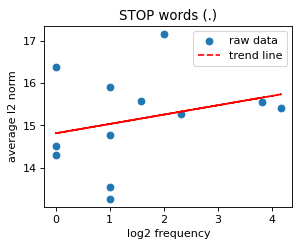

The Pearson correlation coefficient: 0.271875
The p-value (<0.05 to reject null hypothesis): 0.392637
SpearmanrResult(correlation=0.2868286431058876, pvalue=0.36605005879660957)
slope:  0.22158930094471777 (non_square norm/log2-frequency)
number of points:  12


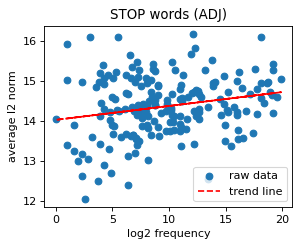

The Pearson correlation coefficient: 0.217874
The p-value (<0.05 to reject null hypothesis): 0.002464
SpearmanrResult(correlation=0.19435382238637694, pvalue=0.007057253531846549)
slope:  0.034744068215531825 (non_square norm/log2-frequency)
number of points:  191


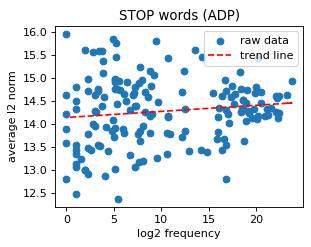

The Pearson correlation coefficient: 0.128716
The p-value (<0.05 to reject null hypothesis): 0.100467
SpearmanrResult(correlation=0.13073716634665197, pvalue=0.09519346777789046)
slope:  0.013263237199772963 (non_square norm/log2-frequency)
number of points:  164


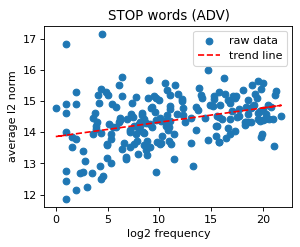

The Pearson correlation coefficient: 0.332702
The p-value (<0.05 to reject null hypothesis): 0.000001
SpearmanrResult(correlation=0.33282975485560845, pvalue=1.1507270765487514e-06)
slope:  0.045994327094061684 (non_square norm/log2-frequency)
number of points:  204


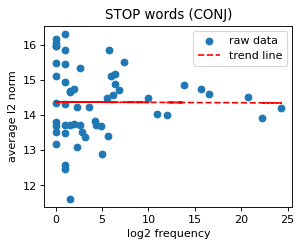

The Pearson correlation coefficient: -0.006263
The p-value (<0.05 to reject null hypothesis): 0.963805
SpearmanrResult(correlation=-0.039320429005919075, pvalue=0.7756284928936068)
slope:  -0.0010720832276609473 (non_square norm/log2-frequency)
number of points:  55


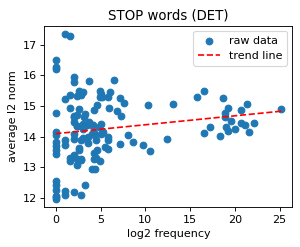

The Pearson correlation coefficient: 0.179801
The p-value (<0.05 to reject null hypothesis): 0.042271
SpearmanrResult(correlation=0.23379805031777265, pvalue=0.007905206175254696)
slope:  0.02916976764416826 (non_square norm/log2-frequency)
number of points:  128


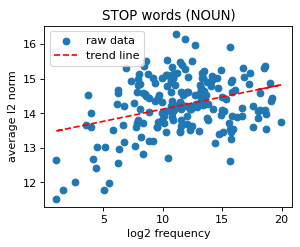

The Pearson correlation coefficient: 0.334261
The p-value (<0.05 to reject null hypothesis): 0.000002
SpearmanrResult(correlation=0.19461941322801213, pvalue=0.00640374764515908)
slope:  0.07060203117802179 (non_square norm/log2-frequency)
number of points:  195


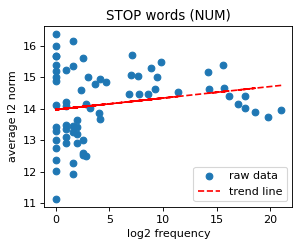

The Pearson correlation coefficient: 0.194587
The p-value (<0.05 to reject null hypothesis): 0.109114
SpearmanrResult(correlation=0.16953563614659373, pvalue=0.16372698120397386)
slope:  0.03668991859666973 (non_square norm/log2-frequency)
number of points:  69


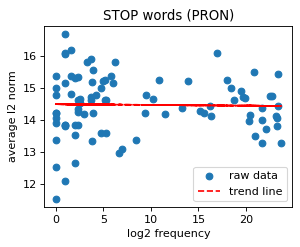

The Pearson correlation coefficient: -0.021687
The p-value (<0.05 to reject null hypothesis): 0.840132
SpearmanrResult(correlation=-0.02115312477258809, pvalue=0.8440160508697057)
slope:  -0.002415224967296358 (non_square norm/log2-frequency)
number of points:  89


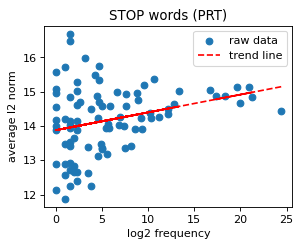

The Pearson correlation coefficient: 0.294209
The p-value (<0.05 to reject null hypothesis): 0.005397
SpearmanrResult(correlation=0.30134251719385213, pvalue=0.004330011071056609)
slope:  0.051898896218497685 (non_square norm/log2-frequency)
number of points:  88


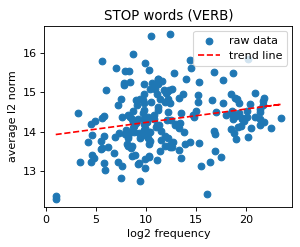

The Pearson correlation coefficient: 0.224243
The p-value (<0.05 to reject null hypothesis): 0.001161
SpearmanrResult(correlation=0.24875274902712965, pvalue=0.00030123690252489317)
slope:  0.03395984883463014 (non_square norm/log2-frequency)
number of points:  207


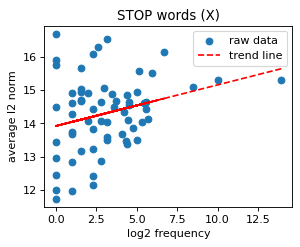

The Pearson correlation coefficient: 0.277996
The p-value (<0.05 to reject null hypothesis): 0.026137
SpearmanrResult(correlation=0.2434308490740995, pvalue=0.05258281908385595)
slope:  0.12318024118729569 (non_square norm/log2-frequency)
number of points:  64


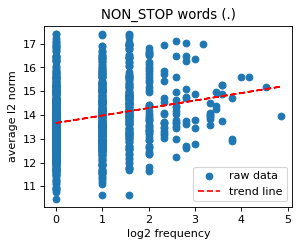

The Pearson correlation coefficient: 0.201987
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.21169574726355772, pvalue=1.4181254790100022e-11)
slope:  0.31582110805592434 (non_square norm/log2-frequency)
number of points:  998


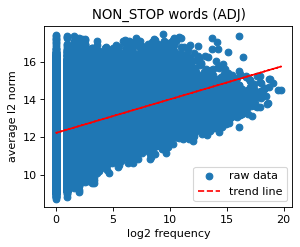

The Pearson correlation coefficient: 0.414411
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.41035987690896497, pvalue=0.0)
slope:  0.17883238565852155 (non_square norm/log2-frequency)
number of points:  187067


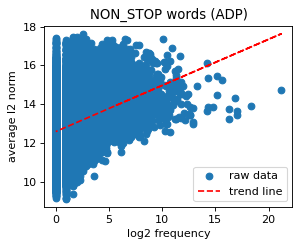

The Pearson correlation coefficient: 0.358731
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3584777410285694, pvalue=0.0)
slope:  0.2375804377104005 (non_square norm/log2-frequency)
number of points:  29772


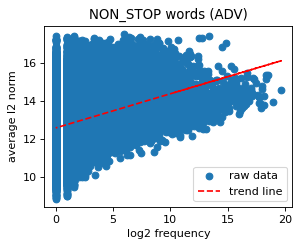

The Pearson correlation coefficient: 0.375013
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.38999743961760136, pvalue=0.0)
slope:  0.17950002787046254 (non_square norm/log2-frequency)
number of points:  64764


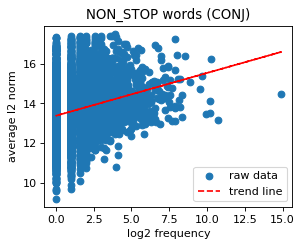

The Pearson correlation coefficient: 0.248349
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.2576550757230548, pvalue=3.408643029015442e-78)
slope:  0.21570457630916587 (non_square norm/log2-frequency)
number of points:  5104


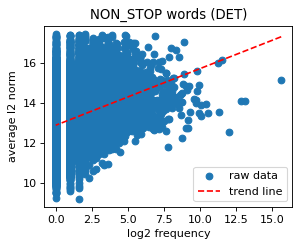

The Pearson correlation coefficient: 0.333287
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.34817447103232746, pvalue=0.0)
slope:  0.28427762632616804 (non_square norm/log2-frequency)
number of points:  14381


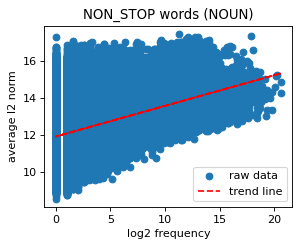

The Pearson correlation coefficient: 0.435751
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3949360922376658, pvalue=0.0)
slope:  0.16584524133930745 (non_square norm/log2-frequency)
number of points:  449252


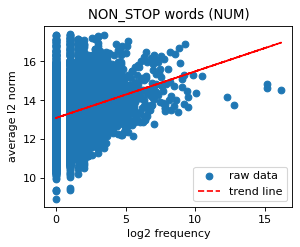

The Pearson correlation coefficient: 0.283833
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.29630703871913977, pvalue=1.6989499234310128e-113)
slope:  0.24008001332892737 (non_square norm/log2-frequency)
number of points:  5581


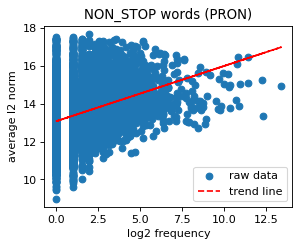

The Pearson correlation coefficient: 0.332399
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3503027347830113, pvalue=3.3975299071644746e-240)
slope:  0.2928020758400751 (non_square norm/log2-frequency)
number of points:  8369


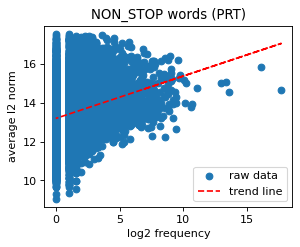

The Pearson correlation coefficient: 0.286615
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.3000193756134537, pvalue=3.731913446967758e-205)
slope:  0.21798855005326817 (non_square norm/log2-frequency)
number of points:  9906


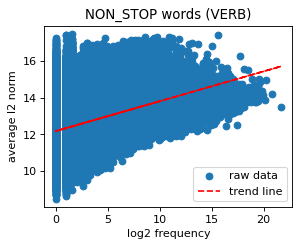

The Pearson correlation coefficient: 0.424257
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.433556179839973, pvalue=0.0)
slope:  0.1621990457898579 (non_square norm/log2-frequency)
number of points:  209669


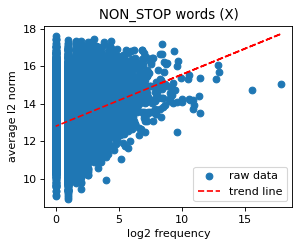

The Pearson correlation coefficient: 0.308031
The p-value (<0.05 to reject null hypothesis): 0.000000
SpearmanrResult(correlation=0.282618200993856, pvalue=2.3159198030217003e-229)
slope:  0.27463497081875204 (non_square norm/log2-frequency)
number of points:  12562


In [52]:
pos_list = sorted(set([i[1] for i in list(new_dict.keys())]))
stop_or_non = ['STOP', 'NON_STOP']
for typ in stop_or_non:
    for pos in pos_list:
        data = {i:k for (i,k) in new_dict.items() if i[1]==pos and i[2]==typ}
        local_prop_plot('l2norm', data, typ, pos, 'non_square')
        print('number of points: ', len(data))